BTC - 2016 Hourly

In [28]:
import coinapi_rest_v1
import datetime, sys
import os, re
from dotenv import load_dotenv
load_dotenv()
from coinapi_rest_v1 import CoinAPIv1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

%matplotlib inline

In [29]:
key = os.getenv('API_KEY')
api = CoinAPIv1(key)

In [30]:
# Verify API Connection:
exchange_rate = api.exchange_rates_get_specific_rate('BTC', 'USD')
print('Time: %s' % exchange_rate['time'])
print('Base: %s' % exchange_rate['asset_id_base'])
print('Quote: %s' % exchange_rate['asset_id_quote'])
print('Rate: %s' % exchange_rate['rate'])

Time: 2020-06-26T10:21:24.2123818Z
Base: BTC
Quote: USD
Rate: 9595.63323349233


In [31]:
start_of_2016 = datetime.date(2016, 1, 1).isoformat()
end_of_2016 = datetime.date(2016, 12, 31).isoformat()

In [52]:
start_of_2016

'2016-01-01'

In [12]:
# Generate Query for all 2016 data:
ohlcv_2016_1hrs = api.ohlcv_historical_data('BITSTAMP_SPOT_BTC_USD', \
                        {'period_id': '1HRS', \
                         'time_start': start_of_2016, \
                         'time_end': end_of_2016, \
                         'limit':10000})

In [32]:
df_2016_1hrs = pd.DataFrame(ohlcv_2016_1hrs)
df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2016-01-01T00:00:00.0000000Z,2016-01-01T04:00:00.0000000Z,2016-01-01T00:01:01.1500000Z,2016-01-01T03:59:54.0270000Z,430.89,433.37,429.08,433.37,159.763701,309
1,2016-01-01T04:00:00.0000000Z,2016-01-01T08:00:00.0000000Z,2016-01-01T04:02:23.7370000Z,2016-01-01T07:57:03.2800000Z,433.34,436.00,430.08,434.16,1284.890890,789
2,2016-01-01T08:00:00.0000000Z,2016-01-01T12:00:00.0000000Z,2016-01-01T08:00:34.9600000Z,2016-01-01T11:57:14.6300000Z,433.82,434.19,431.00,432.72,634.844456,269
3,2016-01-01T12:00:00.0000000Z,2016-01-01T16:00:00.0000000Z,2016-01-01T12:00:34.4470000Z,2016-01-01T15:59:54.5070000Z,433.62,434.96,427.20,431.52,573.165973,561
4,2016-01-01T16:00:00.0000000Z,2016-01-01T20:00:00.0000000Z,2016-01-01T16:00:26.0170000Z,2016-01-01T19:55:58.0570000Z,431.70,434.98,431.70,433.60,531.333976,708


In [72]:
# Save Results:
df_2016_1hrs.to_csv('df_2016_1hrs.csv')

In [43]:
from matplotlib.dates import DateFormatter

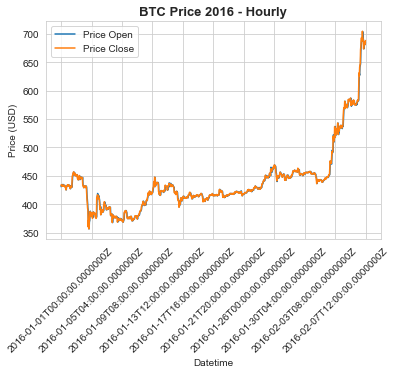

In [51]:
sns.set_style('whitegrid')
sns.color_codes=True
fig, ax = plt.subplots()

# Select Data:
sns.lineplot(data=df_2016_1hrs, x=df_2016_1hrs.time_period_start, y=df.price_open, ax=ax)
sns.lineplot(data=df_2016_1hrs, x=df_2016_1hrs.time_period_start, y=df.price_close, ax=ax)

# Label Plot:
plt.legend(labels=['Price Open', 'Price Close'])
ax.set_title('BTC Price 2016 - Hourly', fontsize=13, fontweight='semibold')
ax.set_xlabel('Datetime')
ax.set_ylabel('Price (USD)')
plt.xticks(rotation=45)

# Customize Axis Label:
#date_form = DateFormatter("%y-%m-%d")
#ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()

In [61]:
def generate_query(start, end, freq, df, limit):
    '''Generate customized query to CoinAPI with own API KEY, store results
    in DataFrame. For freq options see CoinAPI docs.
    
    Keyword Arguments:
    start: 'yyyy-mm-dd' (str), 
    end: 'yyyy-mm-dd' (str),
    df: Create DataFrame name (str)
    limit: Limit number of results (int)
    '''
    
    query = api.ohlcv_historical_data('BITSTAMP_SPOT_BTC_USD', \
                        {'period_id': freq, \
                         'time_start': start, \
                         'time_end': end, \
                         'limit':limit})
    df = pd.DataFrame(query)
    return df

In [65]:
# API LIMIT REACHED - PUSHING for now
generate_query(start='2016-01-10', end='2016-01-25', freq='12HRS', df='Test_query', limit=1)

HTTPError: HTTP Error 429: Too Many Requests